# Health and Wealth: Life Expectancy vs GDP per Capita (Gapminder)

**Question.** Across countries, do richer countries tend to have higher life expectancy?

We'll use the Gapminder country dataset and focus on one year (2007) to keep this a clean **cross-sectional** linear regression example.

We will fit the model
$$
\text{lifeExp}_i = \beta_0 + \beta_1 \log(\text{gdpPercap}_i) + \varepsilon_i.
$$

Why $\log(\text{gdpPercap})$? GDP per capita is very right-skewed; taking logs often makes the relationship closer to linear and easier to interpret.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

import classlib as cl

%matplotlib inline

rng = np.random.default_rng(20251222)

cl.nbviz.init(use_tex=True)
colors = cl.nbviz.TOL_BRIGHT
cl.nbviz.configure(figpath="_figures/approval_rating", savefigs=True, imgfrmt="png")  #change to "...figures/..." to track

## Load data (Gapminder)

In [2]:
# We'll load Gapminder from plotly's built-in dataset.
# If plotly isn't installed, you'll get an import error; in that case install it or load a CSV copy.
import plotly.express as px

gap = px.data.gapminder()
gap.head()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


## Filter to year 2007

In [3]:
df = gap.query("year == 2007").copy()

# Create log GDP per capita
df["log_gdpPercap"] = np.log(df["gdpPercap"])

df[["country","continent","year","lifeExp","gdpPercap","log_gdpPercap","pop"]].head()


,country,continent,year,lifeExp,gdpPercap,log_gdpPercap,pop
11,Afghanistan,Asia,2007,43.828,974.580338,6.882007,31889923
23,Albania,Europe,2007,76.423,5937.029526,8.688964,3600523
35,Algeria,Africa,2007,72.301,6223.367465,8.736066,33333216
47,Angola,Africa,2007,42.731,4797.231267,8.475794,12420476
59,Argentina,Americas,2007,75.320,12779.379640,9.455588,40301927


## Plotting the life expectancy vs GDP per capita

### First we use a linear scale

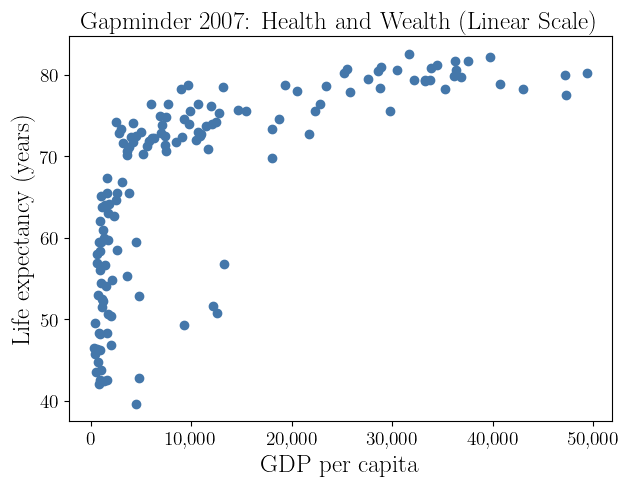

In [5]:
from matplotlib.ticker import StrMethodFormatter
plt.figure(figsize=(7,5))
plt.scatter(df["gdpPercap"], df["lifeExp"])
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xlabel("GDP per capita")
plt.ylabel("Life expectancy (years)")
plt.title("Gapminder 2007: Health and Wealth (Linear Scale)")
cl.nbviz.savefig("health_wealth_linear_scale")

### Semi-log-x plot
Since there are many countries with low GDPs, we transform the data by taking the natural logarithm of GDP per capita

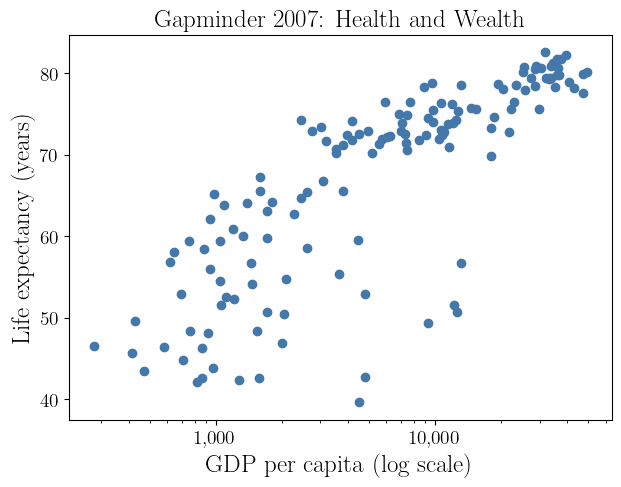

In [6]:
from matplotlib.ticker import StrMethodFormatter
plt.figure(figsize=(7,5))
plt.semilogx(df["gdpPercap"], df["lifeExp"], "o")
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xlabel("GDP per capita (log scale)")
plt.ylabel("Life expectancy (years)")
plt.title("Gapminder 2007: Health and Wealth")
cl.nbviz.savefig("health_wealth_semilogx_scale")

## Fit the linear regression model

In [6]:
model = smf.ols("lifeExp ~ log_gdpPercap", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     265.2
Date:                Mon, 05 Jan 2026   Prob (F-statistic):           4.12e-34
Time:                        17:00:47   Log-Likelihood:                -479.26
No. Observations:                 142   AIC:                             962.5
Df Residuals:                     140   BIC:                             968.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.9496      3.858      1.283      0.202      -2.677      12.576
log_gdpPercap     7.2028      0.442     16.283      0.000       6.328       8.077
==============================================================================
Omnibus:                       40.647   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.274
Skew:                          -1.341   Prob(JB):                     2.02e-16
Kurtosis:                       5.240   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting the slope

Because the predictor is $\log(\text{gdpPercap})$, the slope $\beta_1$ is the expected change in life expectancy for a **multiplicative** change in GDP per capita.

Two handy interpretations:

- A **doubling** of GDP per capita changes $\log(\text{gdpPercap})$ by $\log(2)$, so the expected change in life expectancy is $\beta_1 \log(2)$ years.
- A **10% increase** changes $\log(\text{gdpPercap})$ by $\log(1.10)$, so the expected change is $\beta_1 \log(1.10)$ years.


In [7]:
beta1 = model.params["log_gdpPercap"]

effect_double = beta1 * np.log(2)
effect_10pct  = beta1 * np.log(1.10)

print(f"Estimated coefficient on log(GDP per capita): {beta1:.3f}\n")

print("Interpreting the coefficient:")
print(f"- Doubling GDP per capita is associated with an increase of "
      f"{effect_double:.2f} years in life expectancy.")
print(f"- A 10% increase in GDP per capita is associated with an increase of "
      f"{effect_10pct:.2f} years in life expectancy.")

Estimated coefficient on log(GDP per capita): 7.203

Interpreting the coefficient:
- Doubling GDP per capita is associated with an increase of 4.99 years in life expectancy.
- A 10% increase in GDP per capita is associated with an increase of 0.69 years in life expectancy.


### Plot with fitted regression line
Now we plot the fitted regression line

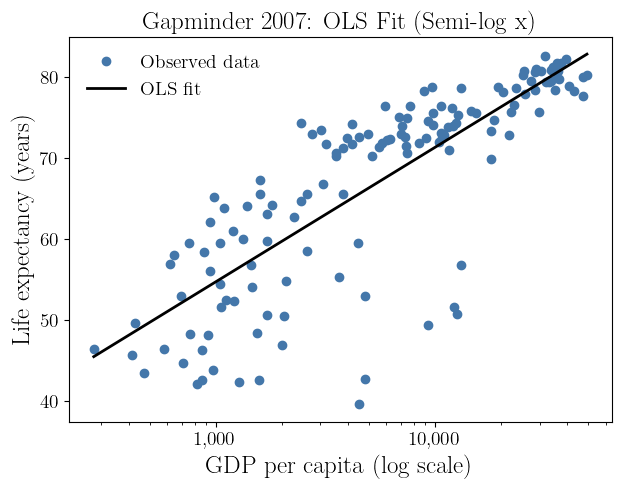

In [8]:
from matplotlib.ticker import StrMethodFormatter

x = df["gdpPercap"]
y = df["lifeExp"]

x_grid = np.linspace(x.min(), x.max(), 400)
y_hat  = (
    model.params["Intercept"]
    + model.params["log_gdpPercap"] * np.log(x_grid)
)

plt.figure(figsize=(7,5))
plt.semilogx(x, y, "o", label="Observed data")
plt.semilogx(x_grid, y_hat, color="black", lw=2, label="OLS fit")

plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xlabel("GDP per capita (log scale)")
plt.ylabel("Life expectancy (years)")
plt.title("Gapminder 2007: OLS Fit (Semi-log x)")
plt.legend();


## Diagnostics

We want to see how well the line fits.  We can see that there are some countries that do not fit so well

### Residuals vs fitted values

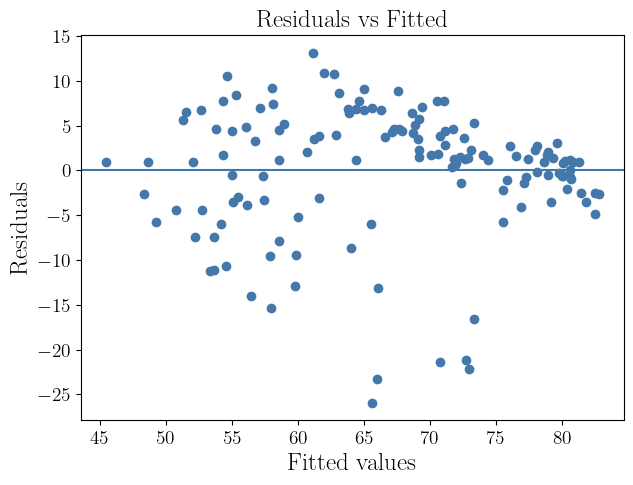

In [9]:
fitted = model.fittedvalues
resid  = model.resid

plt.figure(figsize=(7,5))
plt.scatter(fitted, resid)
plt.axhline(0)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


### Normal Q–Q plot (optional)

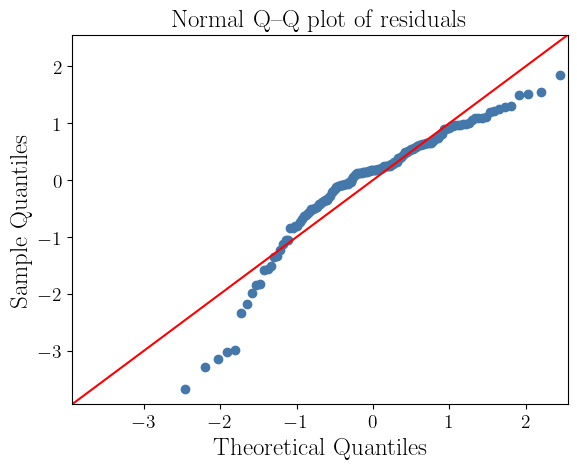

In [10]:
sm.qqplot(resid, line="45", fit=True)
plt.title("Normal Q–Q plot of residuals")
plt.show()


### Which countries are above/below the fitted line?

- Countries falling _below_ the fitted line have a _worse_ life expectancy than what is explained by GDP.
- Countries falling _above_ the fitted line have a _better_ life expectancy than what is explained by GDP.

In [11]:
df2 = df.copy()
df2["fitted"] = fitted
df2["resid"] = resid

df2.sort_values("resid").head(10)[["country","continent","lifeExp","gdpPercap","resid"]]


,country,continent,lifeExp,gdpPercap,resid
1463,Swaziland,Africa,39.613,4513.480643,-25.946918
47,Angola,Africa,42.731,4797.231267,-23.268076
167,Botswana,Africa,50.728,12569.851770,-22.209263
1415,South Africa,Africa,49.339,9269.657808,-21.404615
491,Equatorial Guinea,Africa,51.579,12154.089750,-21.115993
551,Gabon,Africa,56.735,13206.484520,-16.558130
887,Lesotho,Africa,42.592,1569.331442,-15.358743
1691,Zambia,Africa,42.384,1271.211593,-14.049262
1067,Namibia,Africa,52.906,4811.060429,-13.113809
1139,Nigeria,Africa,46.859,2013.977305,-12.888567


In [12]:
df2.sort_values("resid", ascending=False).head(10)[["country","continent","lifeExp","gdpPercap","resid"]]


,country,continent,lifeExp,gdpPercap,resid
1655,Vietnam,Asia,74.249,2441.576404,13.114661
1115,Nicaragua,Americas,72.899,2749.320965,10.909616
1667,West Bank and Gaza,Asia,73.422,3025.349798,10.743504
323,Comoros,Africa,65.152,986.147879,10.547669
839,"Korea, Dem. Rep.",Asia,67.297,1593.065480,9.238140
1499,Syria,Asia,74.143,4184.548089,9.128117
23,Albania,Europe,76.423,5937.029526,8.888503
1223,Philippines,Asia,71.688,3190.481016,8.626711
1079,Nepal,Asia,63.785,1091.359778,8.450497
395,Cuba,Americas,78.273,8948.102923,7.783679


## Extension: add continent indicators (optional)

This model asks: after accounting for GDP per capita, are there systematic differences in life expectancy across continents?

$$
\text{lifeExp} = \beta_0 + \beta_1 \log(\text{gdpPercap}) + \gamma_{\text{continent}} + \varepsilon.
$$


In [13]:
model_cont = smf.ols("lifeExp ~ log_gdpPercap + C(continent)", data=df).fit()
model_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeExp   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     89.72
Date:                Mon, 05 Jan 2026   Prob (F-statistic):           2.52e-41
Time:                        17:00:47   Log-Likelihood:                -451.17
No. Observations:                 142   AIC:                             914.3
Df Residuals:                     136   BIC:                             932.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   20.1376      4.033      4.993      0.000      12.162      28.113
C(continent)[T.Americas]    11.6942      1.655      7.068      0.000       8.422      14.966
C(continent)[T.Asia]        10.1144      1.476      6.852      0.000       7.195      13.034
C(continent)[T.Europe]      11.2682      1.894      5.951      0.000       7.524      15.013
C(continent)[T.Oceania]     12.9293      4.521      2.860      0.005       3.989      21.870
log_gdpPercap                4.6308      0.527      8.780      0.000       3.588       5.674
==============================================================================
Omnibus:                       11.329   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.745
Skew:                          -0.397   Prob(JB):                     0.000140
Kurtosis:                       4.539   Cond. No.                         90.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

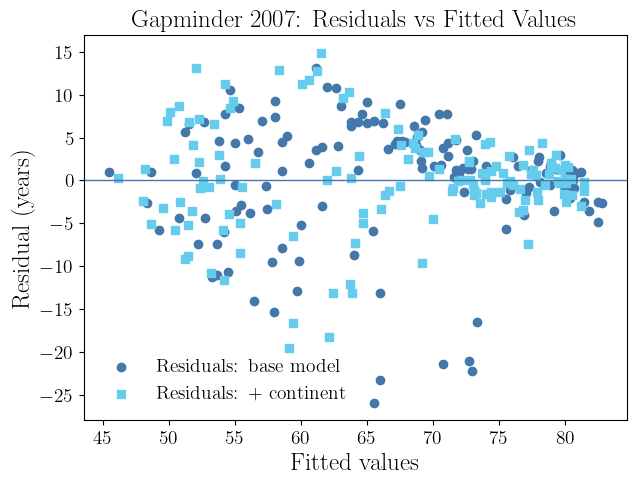

In [14]:
fitted_base = model.fittedvalues
fitted_cont = model_cont.fittedvalues

res_base = model.resid
res_cont = model_cont.resid

plt.figure(figsize=(7,5))
plt.scatter(fitted_base, res_base, label="Residuals: base model")
plt.scatter(fitted_cont, res_cont, marker="s", label="Residuals: + continent")
plt.axhline(0, linewidth=1)

plt.xlabel("Fitted values")
plt.ylabel("Residual (years)")
plt.title("Gapminder 2007: Residuals vs Fitted Values")
plt.legend();

## Discussion questions

1. What does the slope in the simple model mean in words?
2. Use the fitted model to estimate the expected difference in life expectancy between two countries whose GDP per capita differs by a factor of 2.
3. Look at the countries with the largest positive/negative residuals. Pick one and offer a plausible explanation (policy, geography, conflict, inequality, etc.).
4. In the continent-extended model, how do the continent coefficients change the story?
5. Why does this analysis not establish that higher GDP **causes** longer life expectancy?
